# THIS IS A PROBLEM OF REGRESSOR OF BIGMART DATA SALES

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("D:/bigmartsales.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
# the output or target variable is Item_Outlet_Sales
# problem statement is regression

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
m = df["Item_Weight"].mean()

In [9]:
m

12.857645184136183

In [10]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [11]:
df["Item_Weight"].fillna(value = m, inplace = True)

In [12]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
mod = df["Outlet_Size"].mode()[0]

In [16]:
df["Outlet_Size"].fillna(value = mod,inplace=True)

In [17]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].map({"Low Fat": "LOW FAT","LF":"LOW FAT","low fat": "LOW FAT","Regular":"REGULAR","reg":"REGULAR"})

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LOW FAT,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
df["Item_Fat_Content"].value_counts()

LOW FAT    5517
REGULAR    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
df["Outlet_Identifier"].value_counts()
# we are considering this column to be nominal data

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [25]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

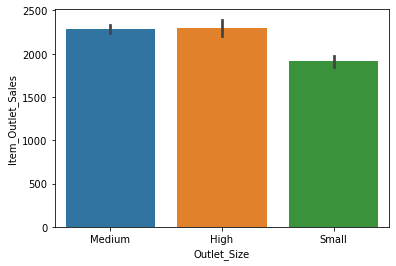

In [27]:
sns.barplot(x ="Outlet_Size", y= "Item_Outlet_Sales", data = df, estimator= np.mean)

In [28]:
df["Outlet_Size"] = df["Outlet_Size"].map({"High":3,"Medium":2,"Small":1})

In [29]:
df["Outlet_Size"].value_counts()

2    5203
1    2388
3     932
Name: Outlet_Size, dtype: int64

In [30]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,LOW FAT,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,REGULAR,0.000000,Baking Goods,51.4008,OUT018,2009,2,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,REGULAR,0.012741,Snack Foods,57.6588,OUT013,1987,3,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,LOW FAT,0.127470,Snack Foods,107.7622,OUT027,1985,2,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,REGULAR,0.016687,Frozen Foods,96.9726,OUT045,2002,2,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,REGULAR,0.094450,Frozen Foods,187.8214,OUT017,2007,2,Tier 2,Supermarket Type1,4710.5350


In [31]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [32]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

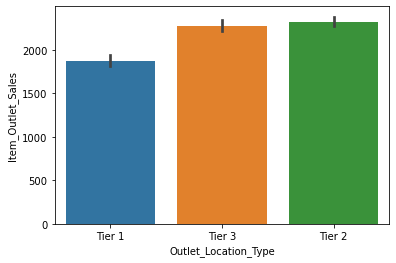

In [33]:
sns.barplot(x ="Outlet_Location_Type", y= "Item_Outlet_Sales", data = df, estimator= np.mean)

In [34]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [35]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [36]:
df["Item_Identifier"] = df["Item_Identifier"].apply(lambda x : x[0:2])

In [37]:
df["Item_Identifier"] = df["Item_Identifier"].map({"FD":"FOOD","DR":"DRINK","NC": "NON CONSUMABLES"})

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FOOD,9.30,LOW FAT,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRINK,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FOOD,17.50,LOW FAT,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FOOD,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NON CONSUMABLES,8.93,LOW FAT,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


In [39]:
 df = pd.get_dummies(df,drop_first=True)

In [40]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_FOOD,Item_Identifier_NON CONSUMABLES,Item_Fat_Content_REGULAR,Item_Type_Breads,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,2,3735.1380,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,443.4228,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2,2097.2700,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,732.3800,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,3,994.7052,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [97]:
#seperating input and output variables
x = df.drop("Item_Outlet_Sales", axis=1)
y = df[["Item_Outlet_Sales"]]

In [98]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Identifier_FOOD,Item_Identifier_NON CONSUMABLES,Item_Fat_Content_REGULAR,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,2,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,3,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [99]:
y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [44]:
#split the training and testing data

In [45]:
import sklearn

In [46]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
x_train  

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Identifier_FOOD,Item_Identifier_NON CONSUMABLES,Item_Fat_Content_REGULAR,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
549,9.500,0.035206,171.3448,1999,2,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7757,18.000,0.047473,170.5422,2002,2,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
764,17.600,0.076122,111.7202,1997,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
6867,8.325,0.029845,41.6138,2002,2,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2716,12.850,0.137228,155.5630,1997,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395,0.286345,139.1838,1998,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5191,15.600,0.117575,75.6670,2007,2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5390,17.600,0.018944,237.3590,2002,2,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
860,20.350,0.054363,117.9466,2007,2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [102]:
x_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Identifier_FOOD,Item_Identifier_NON CONSUMABLES,Item_Fat_Content_REGULAR,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,14.300000,0.026300,79.4302,1987,3,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2957,7.930000,0.071136,42.7086,1997,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7031,14.500000,0.041313,42.0454,1999,2,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1084,12.857645,0.044767,173.7054,1985,2,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
856,10.195000,0.012456,197.5110,2004,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,11.800000,0.093656,127.1704,1997,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3257,7.020000,0.000000,148.1734,2009,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6346,14.500000,0.041215,42.0454,1987,3,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
6318,9.800000,0.141184,50.5008,2009,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [103]:
y_train

,Item_Outlet_Sales
549,2386.2272
7757,3103.9596
764,1125.2020
6867,284.2966
2716,4224.5010
...,...
5734,280.9676
5191,1301.6390
5390,6145.3340
860,1649.8524


In [104]:
y_test

,Item_Outlet_Sales
7503,1743.0644
2957,356.8688
7031,377.5086
1084,5778.4782
856,2356.9320
...,...
7205,3004.0896
3257,890.8404
6346,629.1810
6318,253.0040


In [105]:
from sklearn.preprocessing import StandardScaler

In [53]:
#from sklearn.preprocessing import MinMaxScaler

In [54]:
#scalar = MinMaxScaler()
#x_train_s = scalar.fit_transform(x_train) # min and max
#x_test_s  = scalar.transform(x_test)

In [55]:
scalar = StandardScaler()

In [106]:
x_train_s = scalar.fit_transform(x_train) # mean and std deviation
x_test_s  = scalar.transform(x_test)

In [107]:
x_train_s

array([[-0.80021083, -0.60070308,  0.47070929, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.21131742, -0.36215854,  0.45787656, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.11665727,  0.19493285, -0.48262534, ...,  0.73041993,
        -0.35209326, -0.35445699],
       ...,
       [ 1.11665727, -0.91693149,  1.52620691, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 1.76744582, -0.22818684, -0.38307175, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 0.82084429, -0.95485942, -0.73811593, ...,  0.73041993,
        -0.35209326, -0.35445699]])

In [108]:
x_test_s

array([[ 0.33571101, -0.77388703, -0.99890847, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [-1.17175193,  0.09797779, -1.58604822, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [ 0.38304109, -0.48194218, -1.59665209, ...,  0.73041993,
        -0.35209326, -0.35445699],
       ...,
       [ 0.38304109, -0.48385674, -1.59665209, ...,  0.73041993,
        -0.35209326, -0.35445699],
       [-0.72921571,  1.46010317, -1.46145914, ..., -1.36907546,
         2.84015657, -0.35445699],
       [-1.17766819, -0.21387994, -0.52251456, ...,  0.73041993,
        -0.35209326, -0.35445699]])

In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [110]:
model = KNeighborsRegressor(n_neighbors=7)

In [111]:
model.fit(x_train_s,y_train)

KNeighborsRegressor(n_neighbors=7)

In [112]:
ypred = model.predict(x_test_s)

In [113]:
ypred

array([[1266.73205714],
       [1369.83594286],
       [1525.44291429],
       ...,
       [1127.00917143],
       [1392.28291429],
       [1214.89477143]])

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [115]:
mean_absolute_error(y_test,ypred)

862.047827398408

In [116]:
mean_squared_error(y_test, ypred)

1406336.2075155275

In [117]:
rmse = np.sqrt(mean_squared_error(y_test, ypred))

In [118]:
rmse

1185.8904702861591

In [119]:
#ELBOW CURVE
mses = []
krange = range(1,20,2)
for k in krange:
    m = KNeighborsRegressor(n_neighbors=k)
    m.fit(x_train_s,y_train)
    ypt = m.predict(x_test_s)
    mse = mean_squared_error(y_test,ypt)
    mses.append(mse)

In [120]:
mses

[2254718.4067775453,
 1484261.1073805192,
 1435206.7843858039,
 1406336.2075155275,
 1394561.2081422652,
 1396818.8348909996,
 1413551.1790096043,
 1425124.9164458278,
 1442963.8176429821,
 1451853.4921346782]

In [121]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ELBOW CURVE')

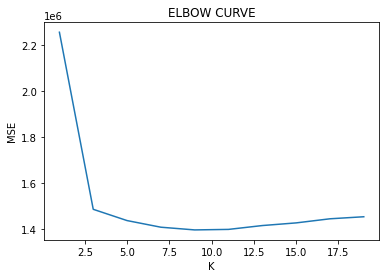

In [122]:
plt.plot(krange,mses)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("ELBOW CURVE")

In [ ]:
# the optimum value of k is equal to 9

# THIS IS A CLASSIFICATION MODEL OF THE TITANIC DATASET

In [123]:
dfx = pd.read_csv("titanic.csv")

In [124]:
dfx.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# here target variable is survived and it has two classes
# it is classification problem

In [125]:
dfx["Survived"].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [126]:
dfx.drop("Name",axis=1,inplace=True)

In [127]:
dfx

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [128]:
dfx.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [129]:
dfx = pd.get_dummies(dfx, drop_first=True)

In [130]:
dfx

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,1
883,1,1,19.0,0,0,30.0000,0
884,0,3,7.0,1,2,23.4500,0
885,1,1,26.0,0,0,30.0000,1


In [131]:
x = dfx.drop("Survived", axis = 1)
y = dfx[["Survived"]]

In [132]:
x.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [133]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [134]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

In [135]:
scalar = MinMaxScaler()
x_train_s = scalar.fit_transform(x_train) # min and max
x_test_s  = scalar.transform(x_test)

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [138]:
model1.fit(x_train_s,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [139]:
ypred1= model1.predict(x_test_s)

In [140]:
ypred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_test,ypred1)

0.8146067415730337